# K-Means Clustering
Here,we will use algorithm named K-Means Clustering.K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.This can be used to confirm business assumptions about what types of groups exist or to identify unknown groups in complex data sets. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the correct group.

In [32]:
#Reading the data
dataset <- read.csv("https://academy.dqlab.id/dataset/customer_segments.txt",sep="\t")
head(dataset)

Customer_ID,Nama.Pelanggan,Jenis.Kelamin,Umur,Profesi,Tipe.Residen,NilaiBelanjaSetahun
CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206
CUST-006,Rosalina Kurnia,Wanita,24,Professional,Cluster,5215541


In [33]:
#Saving the column that needed for K-Means clustering
customer <- c("Jenis.Kelamin","Umur","Profesi","Tipe.Residen")
used <- dataset[customer]
head(used)

Jenis.Kelamin,Umur,Profesi,Tipe.Residen
Pria,58,Wiraswasta,Sector
Wanita,14,Pelajar,Cluster
Pria,48,Professional,Cluster
Pria,53,Professional,Cluster
Wanita,41,Wiraswasta,Cluster
Wanita,24,Professional,Cluster


In [34]:
#Changing the data type of "Jenis.Kelamin","Profesi" and "Tipe.Residen" to matrix
matrixed <- data.matrix(dataset[c("Jenis.Kelamin","Profesi","Tipe.Residen")])
head(matrixed)

Jenis.Kelamin,Profesi,Tipe.Residen
1,5,2
2,3,1
1,4,1
1,4,1
2,5,1
2,4,1


In [35]:
#Merging the variable
newmerg <- data.frame(used,matrixed)
head(newmerg)

Jenis.Kelamin,Umur,Profesi,Tipe.Residen,Jenis.Kelamin.1,Profesi.1,Tipe.Residen.1
Pria,58,Wiraswasta,Sector,1,5,2
Wanita,14,Pelajar,Cluster,2,3,1
Pria,48,Professional,Cluster,1,4,1
Pria,53,Professional,Cluster,1,4,1
Wanita,41,Wiraswasta,Cluster,2,5,1
Wanita,24,Professional,Cluster,2,4,1


In [36]:
#Normalitating "NilaiBelanjaSetahun"
dataset$NilaiBelanjaSetahun <- dataset$NilaiBelanjaSetahun / 1000000
dataset$NilaiBelanjaSetahun

[1]  9.497927  2.722700  5.286429  5.204498 10.615206  5.215541  9.837260
 [8]  5.223569  5.993218  5.257448  5.987367  5.941914  9.333168  9.471615
[15] 10.365668  5.262521  5.677762  5.340690 10.884508  2.896845  9.222070
[22]  5.298157  5.239290 10.259572 10.721998  5.269392  9.114159  6.631680
[29]  5.271845  5.020976  3.042773 10.663179  3.047926  9.759822  5.962575
[36]  9.678994  5.972787 10.477127  5.257775  2.861855  6.820976  9.880607
[43]  5.268410  9.339737  5.211041 10.099807  6.130724 10.390732  4.992585
[50] 10.569316

In [37]:
#Creating data master for Jenis.Kelamin","Profesi" and "Tipe.Residen"
Jenis.Kelamin <- unique(newmerg[c("Jenis.Kelamin","Jenis.Kelamin.1")])
Profesi <- unique(newmerg[c("Profesi","Profesi.1")])
Tipe.Residen <- unique(newmerg[c("Tipe.Residen","Tipe.Residen.1")])
Jenis.Kelamin
Profesi
Tipe.Residen

Jenis.Kelamin,Jenis.Kelamin.1
Pria,1
Wanita,2


,Profesi,Profesi.1
1,Wiraswasta,5
2,Pelajar,3
3,Professional,4
17,Ibu Rumah Tangga,1
31,Mahasiswa,2


Tipe.Residen,Tipe.Residen.1
Sector,2
Cluster,1


In [38]:
#Using kmeans function
dataset <- read.csv("https://academy.dqlab.id/dataset/customer_segments.txt",sep="\t")
customer <- c("Jenis.Kelamin","Umur","Profesi","Tipe.Residen")
used <- dataset[customer]
matrixed <- data.matrix(dataset[c("Jenis.Kelamin","Profesi","Tipe.Residen")])
dataset$NilaiBelanjaSetahun <- dataset$NilaiBelanjaSetahun / 1000000
field <- c("Jenis.Kelamin.1","Umur","Profesi.1","Tipe.Residen.1","NilaiBelanjaSetahun")
customer <- data.frame(dataset,matrixed)
set.seed(100)
segment <- kmeans(x=customer[field],centers=5,nstart=25)
segment

K-means clustering with 5 clusters of sizes 5, 12, 14, 9, 10

Cluster means:
  Jenis.Kelamin.1     Umur Profesi.1 Tipe.Residen.1 NilaiBelanjaSetahun
1            1.40 61.80000  4.200000       1.400000            8.696132
2            1.75 31.58333  3.916667       1.250000            7.330958
3            2.00 20.07143  3.571429       1.357143            5.901089
4            2.00 42.33333  4.000000       1.555556            8.804791
5            1.70 52.50000  3.800000       1.300000            6.018321

Clustering vector:
 [1] 1 3 5 5 4 3 1 5 2 2 5 5 1 1 3 2 2 1 2 3 4 5 2 4 2 5 2 4 5 4 3 4 3 3 4 2 3 4
[39] 3 3 3 2 2 3 3 3 5 4 2 5

Within cluster sum of squares by cluster:
[1]  58.21123 174.85164 316.73367 171.67372 108.49735
 (between_SS / total_SS =  92.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [39]:
#Displaying cluster
customer$Cluster <- segment$cluster
segment$cluster

[1] 1 3 5 5 4 3 1 5 2 2 5 5 1 1 3 2 2 1 2 3 4 5 2 4 2 5 2 4 5 4 3 4 3 3 4 2 3 4
[39] 3 3 3 2 2 3 3 3 5 4 2 5

In [40]:
#Displaying the size of first cluster 
which(customer$Cluster==1)
length(which(customer$Cluster==1))

[1]  1  7 13 14 18

[1] 5

In [41]:
#Displaying the customer data that exist in the first cluster
customer[which(customer$Cluster==1),]

,Customer_ID,Nama.Pelanggan,Jenis.Kelamin,Umur,Profesi,Tipe.Residen,NilaiBelanjaSetahun,Jenis.Kelamin.1,Profesi.1,Tipe.Residen.1,Cluster
1,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9.497927,1,5,2,1
7,CUST-007,"Cahyono, Agus",Pria,64,Wiraswasta,Sector,9.837260,1,5,2,1
13,CUST-013,Cahaya Putri,Wanita,64,Wiraswasta,Cluster,9.333168,2,5,1,1
14,CUST-014,Mario Setiawan,Pria,60,Wiraswasta,Cluster,9.471615,1,5,1,1
18,CUST-018,Nelly Halim,Wanita,63,Ibu Rumah Tangga,Cluster,5.340690,2,1,1,1


In [42]:
#Accessing the centers segmentation
segment$centers

Jenis.Kelamin.1,Umur,Profesi.1,Tipe.Residen.1,NilaiBelanjaSetahun
1.40,61.80000,4.200000,1.400000,8.696132
1.75,31.58333,3.916667,1.250000,7.330958
2.00,20.07143,3.571429,1.357143,5.901089
2.00,42.33333,4.000000,1.555556,8.804791
1.70,52.50000,3.800000,1.300000,6.018321


In [43]:
#Comparing the result of the 2 different centers
testing1 <- kmeans(x=customer[field],centers=2,nstart=25)
testing2 <- kmeans(x=customer[field],centers=5,nstart=25)
testing1
testing2

#Its showed that the Sum of squared errors of kmean with 2 centers is bigger than kmean with 5 centers

K-means clustering with 2 clusters of sizes 23, 27

Cluster means:
  Jenis.Kelamin.1     Umur Profesi.1 Tipe.Residen.1 NilaiBelanjaSetahun
1        1.739130 51.17391  3.913043       1.434783            7.551518
2        1.888889 25.85185  3.777778       1.296296            6.659586

Clustering vector:
 [1] 1 2 1 1 1 2 1 1 2 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 1 2 1 1 1 2 1 2 2 1 2 2 1
[39] 2 2 2 2 2 2 2 2 1 1 2 1

Within cluster sum of squares by cluster:
[1] 1492.481 1524.081
 (between_SS / total_SS =  72.6 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

K-means clustering with 5 clusters of sizes 12, 14, 9, 5, 10

Cluster means:
  Jenis.Kelamin.1     Umur Profesi.1 Tipe.Residen.1 NilaiBelanjaSetahun
1            1.75 31.58333  3.916667       1.250000            7.330958
2            2.00 20.07143  3.571429       1.357143            5.901089
3            2.00 42.33333  4.000000       1.555556            8.804791
4            1.40 61.80000  4.200000       1.400000            8.696132
5            1.70 52.50000  3.800000       1.300000            6.018321

Clustering vector:
 [1] 4 2 5 5 3 2 4 5 1 1 5 5 4 4 2 1 1 4 1 2 3 5 1 3 1 5 1 3 5 3 2 3 2 2 3 1 2 3
[39] 2 2 2 1 1 2 2 2 5 3 1 5

Within cluster sum of squares by cluster:
[1] 174.85164 316.73367 171.67372  58.21123 108.49735
 (between_SS / total_SS =  92.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [44]:
#Comparing the SS of the 10 different centers
sse <- sapply(1:10,
              function(param_k){
                  kmeans(x=customer[field],param_k,nstart=25)$tot.withins
              }
              )
sse

[1] 10990.9740  3016.5612  1550.8725  1064.4187   829.9676   625.1462
 [7]   508.1568   431.6977   374.1095   328.5324

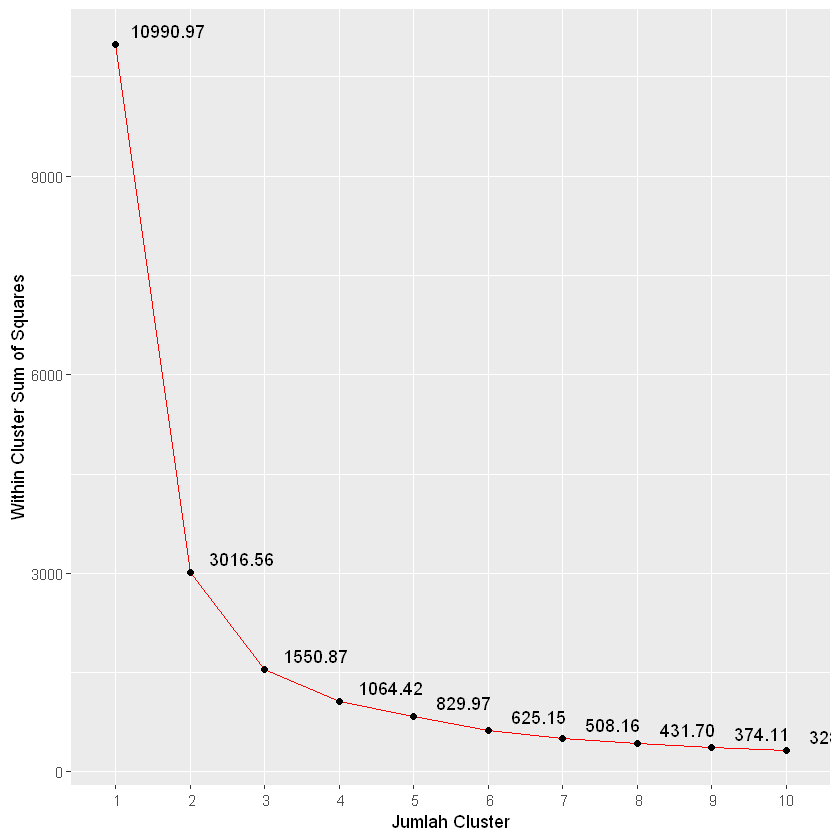

In [45]:
#Elbow effect graphic
library(ggplot2)
jumlah_cluster_max <- 10
sseframe <- data.frame(cluster=c(1:jumlah_cluster_max),sse)
ggplot(sseframe, aes(x=cluster,y=sse)) +
                geom_line(color="red") + geom_point() +
                ylab("Within Cluster Sum of Squares") + xlab("Jumlah Cluster") +
                geom_text(aes(label=format(round(sse, 2), nsmall = 2)),hjust=-0.2, vjust=-0.5) +
  scale_x_discrete(limits=c(1:jumlah_cluster_max))


In [46]:
#Giving name of each cluster
customer.segment <- data.frame(cluster=c(1:5),segment=c("Diamond Senior Member","Gold Young Professional","Silver Mid Youth","Diamond Professional Member","Silver Mid Professional"))
customer.segment

cluster,segment
1,Diamond Senior Member
2,Gold Young Professional
3,Silver Mid Youth
4,Diamond Professional Member
5,Silver Mid Professional


In [48]:
#Merging all of the variables on a list
segmentation <- list(Jenis.Kelamin=Jenis.Kelamin,Tipe.Residen=Tipe.Residen,Profesi=Profesi,Segment=segment,Customer.Segment=customer.segment,field=field)

In [49]:
#Saving the object on file format
saveRDS(segmentation,"Segmentation.rds")

In [50]:
#Creating new data for testing
databaru <- data.frame(Customer_ID="CUST-100", Nama.Pelanggan="Rudi Wilamar",Umur=20,
           Jenis.Kelamin="Wanita",Profesi="Pelajar",Tipe.Residen="Cluster",NilaiBelanjaSetahun=3.5)
databaru

Customer_ID,Nama.Pelanggan,Umur,Jenis.Kelamin,Profesi,Tipe.Residen,NilaiBelanjaSetahun
CUST-100,Rudi Wilamar,20,Wanita,Pelajar,Cluster,3.5


In [51]:
#Reading the rds file
Identitas.Cluster <- readRDS("Segmentation.rds")

In [52]:
#Merging the new data with Reference data
databaru <- merge(databaru, Identitas.Cluster$Profesi)
databaru <- merge(databaru, Identitas.Cluster$Jenis.Kelamin)
databaru <- merge(databaru, Identitas.Cluster$Tipe.Residen)
databaru

Tipe.Residen,Jenis.Kelamin,Profesi,Customer_ID,Nama.Pelanggan,Umur,NilaiBelanjaSetahun,Profesi.1,Jenis.Kelamin.1,Tipe.Residen.1
Cluster,Wanita,Pelajar,CUST-100,Rudi Wilamar,20,3.5,3,2,1


In [56]:
#Determining the cluster
Identitas.Cluster$Customer.Segment[which.min(sapply
                                             ( 1:5, function( x ) sum( ( databaru[Identitas.Cluster$field]
                                                                        - Identitas.Cluster$Segment$centers[x,])^2 ) )),]


,cluster,segment
3,3,Silver Mid Youth


# Learning Sources :
# www.dqlab.id
# https://blogs.oracle.com/datascience/introduction-to-k-means-clustering